# Project: Statistical Analysis

In [1]:
# ideas - categorical variables - onehot encoding

In [2]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [3]:
# GATHER THE DATASET
houses = pd.read_csv('../train.csv')

In [4]:
# visually inspect the first 5 rows of the dataset
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houses.dtypes # get the datatypes of each column

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
list(houses) # visually review the column names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [7]:
houses.shape # so I have 1,460 rows and 81 columns

(1460, 81)

In [8]:
houses.isna().sum() # shows that LotFrontage has 259 null values out of 1,460. but my visual is truncated in Jupyter Notebook, so how can I tell if there are others? 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
houses.isna().sum().sum() # shows me that out of 1460*81 = 118,260 values, 6,965 are nullvalues.

6965

In [10]:
houses.isna().sum().sort_values(ascending = False)[:20] # show me specifically the columns with nullvalues

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [11]:
# what is PoolQC? there's already a PoolArea

In [12]:
houses.PoolQC # object datatype

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [13]:
houses.drop(
    labels = 'PoolQC', # name the column
    axis = 1, # drop the column 
    inplace = True, # inplace drop
)

houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


Now drop the other columns with a high proportion of null values

In [14]:
houses.drop(
    labels = ['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], # name the columns
    axis = 1, # drop the columns, not the rows 
    inplace = True, # inplace drop
)

houses.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Year Columns - convert to a String

In [15]:
houses.YrSold.dtype # so my "year" data is presented as an integer. I do not want it as a numerical value, but a categorical data.

dtype('int64')

In [16]:
houses.YrSold = houses.YrSold.astype(str)

In [17]:
houses.YrSold.dtype

dtype('O')

In [18]:
houses['YearBuilt'].dtype

dtype('int64')

In [19]:
houses.YearBuilt = houses.YearBuilt.astype(str)

In [20]:
houses['YearBuilt'].dtype

dtype('O')

I should have done this as a function from the beginning, and passed in multiple colums, like so:


In [21]:
# year_cols = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

# for year_col in year_cols: 
#     houses2[year_col] = houses2[year_col].astype(str)
#     print(houses2[year_col].dtype)

In [23]:
# what year were most of the houses built?
houses['YearBuilt'].value_counts().index[0]

'2006'

In [24]:
# what was the mean sale price of all houses built in 2006?
houses.query("YearBuilt == '2006'")['SalePrice'].mean()

251775.44776119402

Too many numerical columns to visually quick-inspect the numerical variables for any relationships that jump out with pd.plotting.scatter_matrix(houses)

I see there's at least two SaleConditions present - normal and abnormal. Are there others?

In [25]:
houses.SaleCondition.unique() # yes, four others

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

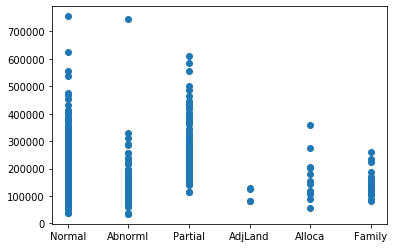

In [26]:
plt.scatter( 
    'SaleCondition', # xvalue
    'SalePrice', # yvalue   
    data = houses, # dataset
)

^ Visually, I see that SaleCondition-Normal has the largest range of values for SalePrice within. 

In [27]:
slope, intercept, r_squared, p_value, std_err = linregress( # spits back a tuple with all of those values
    houses['YearBuilt'].astype(int), #  our x-values 
    houses['SalePrice'], # our y-value
)

slope, intercept, r_squared, p_value, std_err

(1375.373467936892,
 -2530308.2457323563,
 0.5228973328794968,
 2.990229099013855e-103,
 58.71738268910999)

The P-value here, 3 with 102 zeroes in front of it, is our probability that the variation in Y(Sale Price) is due to random chance, and not as a result of change in X(Year Built). 

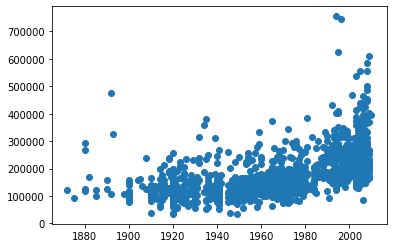

In [28]:
plt.scatter(
    houses['YearBuilt'].astype(int), # our x-values
    houses['SalePrice'], # our y-value
)

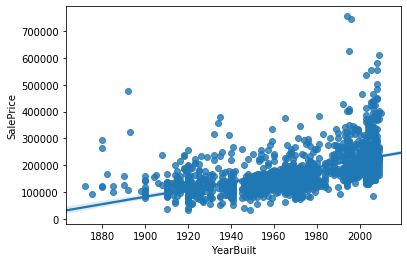

In [29]:
sns.regplot(
    x = houses['YearBuilt'].astype(int),
    y = houses['SalePrice'],
)

In [30]:
np.corrcoef( # create a correlation matrix
    houses['YearBuilt'].astype(int),
    y = houses['SalePrice'],
)

array([[1.        , 0.52289733],
       [0.52289733, 1.        ]])

Interestingly, we see that while earlier we discovered that YearBuilt had a direct impact on SalePrice, they are only moderately correlated in a linear fashion (r=0.523).

Take a look for some other Columns that are more strongly linearly correlated with SalePrice.

First, I'll need to take those categorical variables and adjust them to numerical variables, so we can see how they related to Sale Price

In [31]:
houses

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Resource used for deeper learning: https://www.datacamp.com/community/tutorials/categorical-data

In [33]:
houses.EnclosedPorch.dtype

dtype('int64')

In [34]:
houses.SaleType.unique() # not sure what these values refer to.

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)